# Model Building on a Synthetic Dataset

## Table of Contents

- [Objective](#objective)
- [Exploratory Data Analysis](#eda)
- [Data Processing](#data-processing)
    - [Encoding training data](#encoding-training-data)
    - [Encoding test data](#encoding-test-data)
    - [Missing values](#missing-values)
- [Modeling](#modeling)
    - [Linear Regression](#linear-regression)
    - [Random Forest Regressor](#random-forest-regressor)
    - [Multiple Regression Models](#multiple-regression-models)
    - [Compare Root Mean Square Error (RMSE) and R-Squared for Models](#compare-metrics-all)

## Objective <a id='objective'></a>

This notebook shows the process of building a predictive model using the data in the training set to predict the target values from the test set.

The two synthetic datasets were generated using the same underlying data model.

Predictive accuracy will be assessed using the mean squared error metric.

## Exploratory Data Analysis <a id='eda'></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Set random seed for reproducibility
random.seed(42)

In [3]:
# Read data
train_data = pd.read_csv('data/raw/codetest_train.txt', delimiter='\t')
test_data = pd.read_csv('data/raw/codetest_test.txt', delimiter='\t')

In [4]:
# Display first 5 rows of training data
train_data.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,NaN,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


In [5]:
# Summary statistics of training data
train_data.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,...,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
std,5.259896,0.999739,0.997930,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.988310,...,1.001453,0.997330,0.996458,1.005000,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.673000,-0.685000,-0.651000,-0.655000,-0.685500,-0.660000,-0.672000,-0.679000,-0.662000,...,-0.665750,-0.676000,-0.661750,-0.692000,-0.663000,-0.647750,-0.679500,-0.647000,-0.695000,-0.677000
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.677000,0.674500,0.719000,0.668000,0.654000,0.649000,0.679000,0.670250,0.698000,...,0.671750,0.670000,0.702500,0.655000,0.651000,0.709750,0.660250,0.692000,0.672250,0.705250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


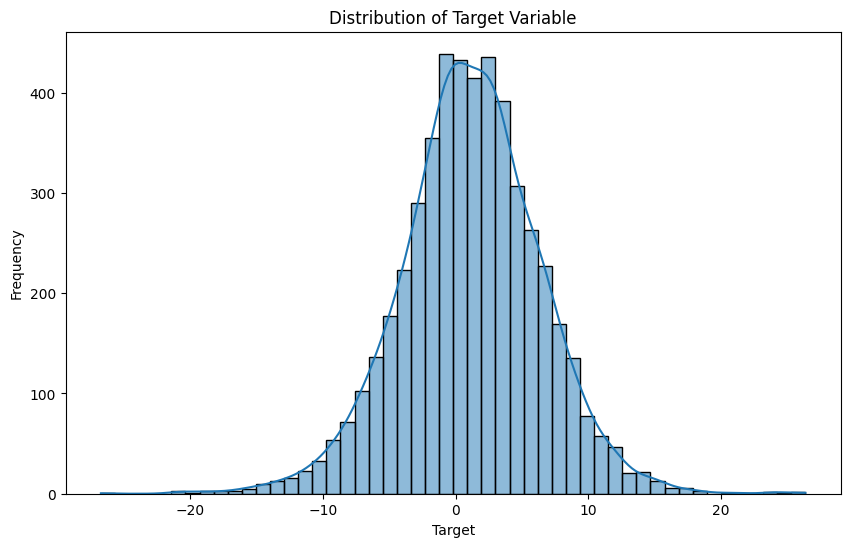

In [6]:
# Visualize distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['target'], bins=50, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

## Data Processing <a id='data-processing'></a>

### Encoding training data <a id='encoding-training-data'></a>

In [7]:
# Check for non-numeric columns
non_numeric_cols = [col for col, dtype in train_data.dtypes.items() if not pd.api.types.is_numeric_dtype(dtype)]

if non_numeric_cols:
    print(f'Columns with non-numeric data types: {non_numeric_cols}')
else:
    print(f'All columns have float or integer data types.')

Columns with non-numeric data types: ['f_61', 'f_121', 'f_215', 'f_237']


In [8]:
# Show first 5 rows of non-numeric columns
train_data[['f_61', 'f_121', 'f_215', 'f_237']].head()

,f_61,f_121,f_215,f_237
0,b,D,red,Canada
1,a,A,blue,Canada
2,b,B,orange,Canada
3,a,C,blue,USA
4,b,E,orange,Canada


In [9]:
# Select non-numeric features
non_numeric_features = train_data.select_dtypes(include='object').columns

# Encode non-numeric features
encoder = LabelEncoder()
train_data[non_numeric_features] = train_data[non_numeric_features].apply(lambda x: encoder.fit_transform(x.astype(str)))

# Check all features are numeric
train_data.select_dtypes(exclude='float64').columns

Index(['f_61', 'f_121', 'f_215', 'f_237'], dtype='object')

In [10]:
# Show first 5 rows of columns
train_data[['f_61', 'f_121', 'f_215', 'f_237']].head()

,f_61,f_121,f_215,f_237
0,1,3,3,0
1,0,0,0,0
2,1,1,2,0
3,0,2,0,2
4,1,4,2,0


### Encoding test data <a id='encoding-test-data'></a>

In [11]:
# Check for non-numeric columns
non_numeric_cols = [col for col, dtype in test_data.dtypes.items() if not pd.api.types.is_numeric_dtype(dtype)]

if non_numeric_cols:
    print(f'Columns with non-numeric data types: {non_numeric_cols}')
else:
    print(f'All columns have float or integer data types.')

Columns with non-numeric data types: ['f_61', 'f_121', 'f_215', 'f_237']


In [12]:
# Select non-numeric features
non_numeric_features_test = test_data.select_dtypes(include='object').columns

# Encode non-numeric features
encoder = LabelEncoder()
test_data[non_numeric_features_test] = test_data[non_numeric_features_test].apply(lambda x: encoder.fit_transform(x.astype(str)))

# Check all features are numeric
test_data.select_dtypes(exclude='float64').columns

Index(['f_61', 'f_121', 'f_215', 'f_237'], dtype='object')

### Missing values <a id='missing-values'></a>

In [13]:
# Check missing values
missing_train = train_data.isna().sum()
missing_test = test_data.isna().sum()

print('Missing values in training data:')
print(missing_train[missing_train > 0])

print('\nMissing values in test data:')
print(missing_test[missing_test > 0])

Missing values in training data:
f_0       97
f_1       72
f_2       92
f_3       90
f_4       93
        ... 
f_249    114
f_250    100
f_251     79
f_252     96
f_253     96
Length: 250, dtype: int64

Missing values in test data:
f_0      28
f_1      17
f_2      17
f_3      18
f_4      22
         ..
f_249    20
f_250    19
f_251    22
f_252    21
f_253    15
Length: 250, dtype: int64


In [14]:
# Fill missing values in training data with median
train_data.fillna(train_data.median(), inplace=True)

# Fill missing values in test data with median
test_data.fillna(test_data.median(), inplace=True)

In [15]:
# Check missing values
missing_train = train_data.isna().sum()
missing_test = test_data.isna().sum()

print('Missing values in training data:')
print(missing_train[missing_train > 0])

print('\nMissing values in test data:')
print(missing_test[missing_test > 0])

Missing values in training data:
Series([], dtype: int64)

Missing values in test data:
Series([], dtype: int64)


## Modeling <a id='modeling'></a>

### Linear Regression <a id='linear-regression'></a>

In [16]:
# Separate features and target variable in training data
X = train_data.drop(columns='target')
y = train_data['target']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data)

# Initialize model
lr_model = LinearRegression()

# Fit model to training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_val_pred = lr_model.predict(X_val_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_val, y_val_pred)
mse

14.010723344651987

### Random Forest Regressor <a id='random-forest-regressor'></a>

In [17]:
# Initialize model
rf_model = RandomForestRegressor(random_state=42)

# Fit model to training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_val_pred_rf = rf_model.predict(X_val_scaled)

# Calculate mean squared error
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
mse_rf

12.025551828152306

### Multiple Regression Models <a id='multiple-regression-models'></a>

In [18]:
# Initialize models
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)

# Fit models to training data
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_val_pred_lasso = lasso_model.predict(X_val_scaled)
y_val_pred_ridge = ridge_model.predict(X_val_scaled)

# Calculate mean squared error
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)

### Compare Root Mean Square Error (RMSE) and R-Squared for Models <a id='compare-metrics-all'></a>

In [19]:
# Calculate RMSE for all models
rmse_lr = np.sqrt(mse)
rmse_rf = np.sqrt(mse_rf)
rmse_lasso = np.sqrt(mse_lasso)
rmse_ridge = np.sqrt(mse_ridge)

# Calculate R-squared for all models
r2_lr = lr_model.score(X_val_scaled, y_val)
r2_rf = rf_model.score(X_val_scaled, y_val)
r2_lasso = lasso_model.score(X_val_scaled, y_val)
r2_ridge = ridge_model.score(X_val_scaled, y_val)

models_all = ['Linear Regression', 'Random Forest', 'Lasso', 'Ridge']
mse_values_all = [mse, mse_rf, mse_lasso, mse_ridge]
rmse_values_all = [rmse_lr, rmse_rf, rmse_lasso, rmse_ridge]
r2_values_all = [r2_lr, r2_rf, r2_lasso, r2_ridge]

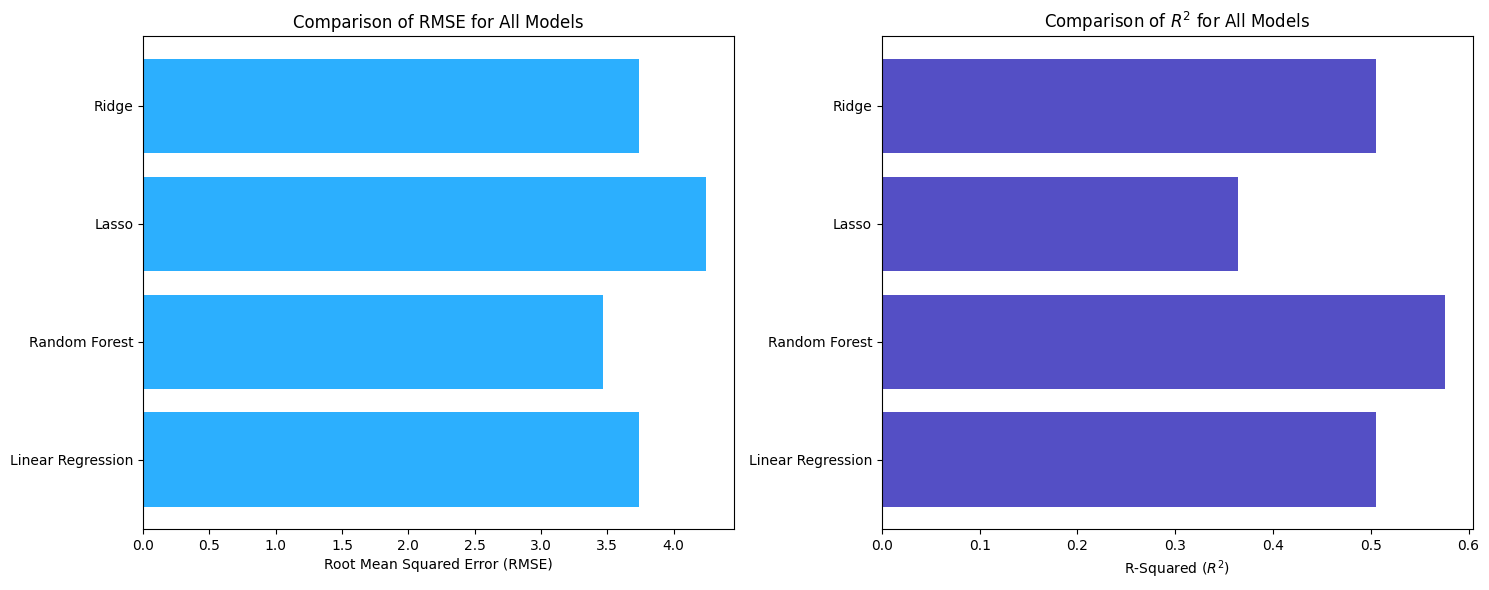

In [20]:
# Create figure and subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create RMSE plot
ax[0].barh(y=models_all, width=rmse_values_all, color='#2caffe')
ax[0].set_xlabel('Root Mean Squared Error (RMSE)')
ax[0].set_title('Comparison of RMSE for All Models')

# Create R-squared plot
ax[1].barh(y=models_all, width=r2_values_all, color='#544fc5')
ax[1].set_xlabel('R-Squared ($R^2$)')
ax[1].set_title('Comparison of $R^2$ for All Models')

# Fit figure
plt.tight_layout()

# Show figure
plt.show()

Here, the random forest regressor model has the lowest root mean squared error (RMSE).

This notebook was inspired by the [Model Building on a Synthetic Dataset](https://platform.stratascratch.com/data-projects/model-building-synthetic-dataset) data project on [StrataScratch](https://www.stratascratch.com/).